In [2]:
import numpy as np
import torch 

In [15]:
np.random.seed(0)
prefnp = np.random.randn(3)
pref = tor.tensor(prefnp, dtype=tor.float32, requires_grad=True)
pol = tor.distributions.Categorical(logits=pref)

In [20]:
pol.probs

tensor([0.5842, 0.1494, 0.2664], grad_fn=<SoftmaxBackward>)

tensor(0.5613, grad_fn=<DivBackward0>)

In [7]:
pol.probs

tensor([0.5842, 0.1494, 0.2664], grad_fn=<SoftmaxBackward>)

In [13]:
pol.sample()

tensor(0)

In [3]:
dist = tor.distributions.Normal(0, 1) 

In [17]:
eps = dist.sample()

In [18]:
eps

tensor(-0.9928)

In [19]:
tor.exp(dist.log_prob(eps))

tensor(0.2437)

In [29]:
tor.exp(dist.log_prob(tor.tensor(-0.1)))

tensor(0.3970)

In [14]:
torch.randn(1)

tensor([0.3850])

/home/taghianj/Documents/env/lib/python3.8/site-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/home/taghianj/Documents/env/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


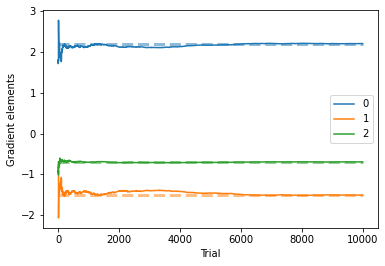

In [23]:
# Checking unbiasedness of the gradient estimate

# Gradient bandit
%reset -f
import numpy as np
import torch as tor
import matplotlib.pyplot as plt


seed = 1
tor.manual_seed(seed)
# Problem parameters
na = 3
r = tor.tensor([-10., +10., 0.])

# True gradient calculation
np.random.seed(seed)
prefnp = np.random.randn(3)
pref = tor.tensor(prefnp, dtype=tor.float32, requires_grad=True)
pol = tor.distributions.Categorical(logits=pref)
piv = pol.probs
jacobian = tor.zeros(3, 3)
for i in range(3):
    pol.probs[i].backward(retain_graph=True)
    jacobian[:,i] = pref.grad.data
    pref.grad.data.zero_()
true_grad = tor.mm(jacobian, (r).reshape(na, 1))

# Solution parameters
pref = tor.tensor(prefnp, requires_grad=True)
opt = tor.optim.SGD([pref], lr=0.1)
pol = tor.distributions.Categorical(logits=pref)

# Experiment parameters
T = 10000
grads = np.zeros((T, na))
for t in range(T):
    # Interaction
    A = pol.sample()
    R = r[A] + tor.randn(1)

    # Form loss
    sur_obj = pol.log_prob(A)*R
    loss = -sur_obj

    # Compute gradient
    opt.zero_grad()
    loss.backward(retain_graph=True)
    
    # Log
    grads[t] = pref.grad.data.clone()

# Plot
for i in range(na):
    plt.plot([0, T], [-true_grad.data[i]]*2, linestyle="--", alpha=0.5, linewidth=3)
grad_mean = np.cumsum(grads, 0)/np.arange(1, T+1, 1).repeat(3).reshape((T, na))
plt.gca().set_prop_cycle(None)
p = plt.plot(grad_mean)
plt.xlabel('Trial')
plt.ylabel('Gradient elements')
plt.legend(iter(p), range(na))
plt.show()

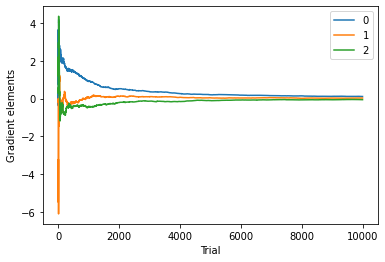

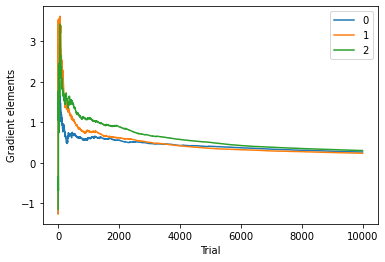

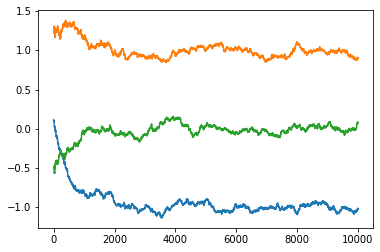

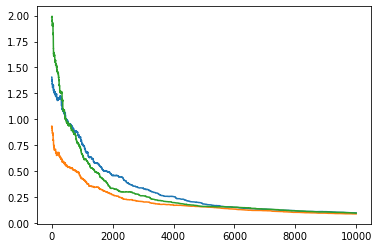

In [34]:
%reset -f

import torch as tor
import matplotlib.pyplot as plt
import numpy as np

# Problem
act_dim = 3
astar = tor.tensor([-1., +1, 0])

# Solution
mu = tor.randn(act_dim, requires_grad=True)
log_sigma = tor.randn(act_dim, requires_grad=True)
opt = tor.optim.SGD([mu, log_sigma], lr=0.001)

# Experiment
T = 10000
mus = tor.zeros(T, act_dim)
sigmas = tor.zeros(T, act_dim)

grads_mu = tor.zeros((T, act_dim))
grads_sigma = tor.zeros((T, act_dim))

for t in range(T):
    # Interaction
    pol = tor.distributions.MultivariateNormal(mu, tor.diag(tor.exp(log_sigma)))
    A = pol.sample()
    R = -tor.norm(A-astar)**2 + tor.randn(1)

    # Compute loss
    sur_obj = pol.log_prob(A)*R
    loss = -sur_obj

    # Update
    opt.zero_grad()
    loss.backward()
    opt.step()

    # Log
    mus[t] = mu.data.clone()
    sigmas[t] = tor.exp(log_sigma.data.clone())
    
    grads_mu[t] = mu.grad.data.clone()
    grads_sigma[t] = log_sigma.grad.data.clone()
    
grad_mean = np.cumsum(grads_mu, 0)/np.arange(1, T+1, 1).repeat(3).reshape((T, act_dim))
plt.gca().set_prop_cycle(None)
p = plt.plot(grad_mean)
plt.xlabel('Trial')
plt.ylabel('Gradient elements')
plt.legend(iter(p), range(act_dim))

plt.figure()
grad_mean = np.cumsum(grads_sigma, 0)/np.arange(1, T+1, 1).repeat(3).reshape((T, act_dim))
plt.gca().set_prop_cycle(None)
p = plt.plot(grad_mean)
plt.xlabel('Trial')
plt.ylabel('Gradient elements')
plt.legend(iter(p), range(act_dim))


plt.figure()    
plt.plot(mus)
plt.figure()
plt.plot(sigmas)
plt.show()

In [36]:
tor.distributions.normal.Normal??

In [45]:
np.random.randn(1)

array([-0.38405435])

In [48]:
tor.norm(tor.tensor(-10.0) + tor.tensor(9.0))

tensor(1.)

In [57]:
tor.randn??